##### Import Packages 

In [20]:
import numpy as np
import gstools as gs
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
#pykirge
from pykrige.ok import OrdinaryKriging
from pykrige.uk import UniversalKriging
from pykrige import variogram_models
from pykrige.ok3d import OrdinaryKriging3D


###### Functions for Cleaning Auxiliary Data and Raw Data

In [7]:
def CleanCassianoAux(fileName):
    with open(fileName, "r") as file:
        data = file.read()
    d = data.replace("\t"," ")
    d = d.replace("\n"," ")
    d = d.split()
    d2 = [float(value) for value in d]
    actualData = np.array(d2).reshape(int(len(d2)/3),3)
    x = actualData[:,0]
    y = actualData[:,1]
    z = actualData[:,2]/100
    
    
    df = pd.DataFrame(
    {"y" : y,
    "x" : x,
    "z" : z})

    df.z = df.z.fillna(0)
    return(df)

In [8]:
def CleanCassiano(fileName):
    
    with open(fileName, "r") as file:
        data = file.read()
    d = data.split(" ")
    for i in range(len(d)):
        if d[i] == '':
            d[i] = 999
    d.remove(999)
    d2 = [float(value) for value in d if value != 999]
    actualData = np.array(d2).reshape(1168,3)
    x = actualData[:,0]
    y = actualData[:,1]
    z = actualData[:,2]
    
    df = pd.DataFrame(
    {"y" : y,
    "x" : x,
    "z" : z})

    return(df)

## Kriging Interpolation

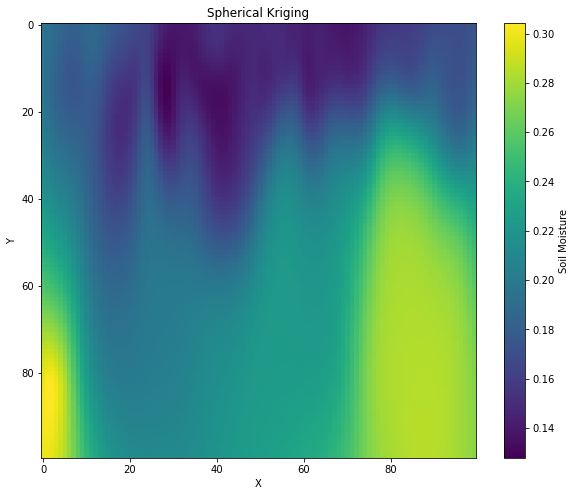

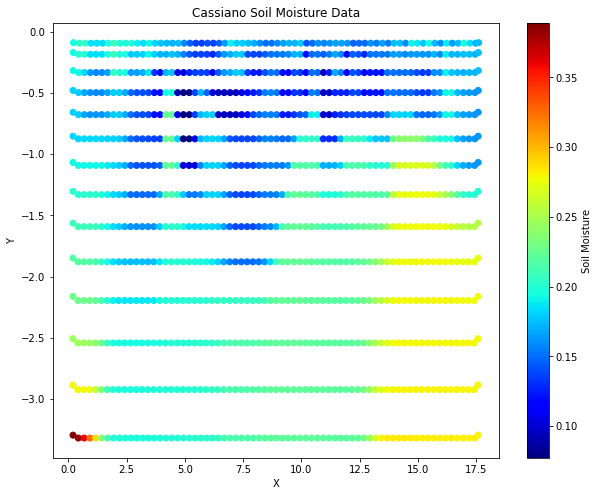

In [30]:
# Step 0: Get Data

# Observed (predicted) data points
fileNameObs = "Moisture_Content_All_Soils_Result (3).txt"
dfObs = CleanCassiano(fileNameObs)
dfObs = dfObs.dropna()

# Auxiliary data points
file_path_5 = "Moisture_5m.txt"
file_path_9 = "Moisture_9m.txt"
file_path_12 = "Moisture_12m.txt"
auxLst = [file_path_5,file_path_9,file_path_12 ]
for i in range(len(auxLst)):
    if i == 0:
        dfAux = CleanCassianoAux(auxLst[i])
    if i > 0:
        df2Aux = CleanCassianoAux(auxLst[i])
        dfAux = pd.concat([dfAux,df2Aux])

# Step 1, Define Vairables

# Step 1.1: Data Preprocessing Observed
# Assuming the observed data is in 'dfObs' pandas df
x_obs = dfObs.x.values
y_obs = dfObs.y.values
z_obs = dfObs.z.values

# Step 1.2: Data Preprocessing Auxiliary
# Assuming the Auxiliary data in 'dfObs' pandas df
x_aux = dfAux.x.values
y_aux = dfAux.y.values
z_aux = dfAux.z.values

# Step 2: Variogram Analysis
# Choose a specific variogram model
variogram_model = 'linear'  # Example: Using linear variogram model

# Create an instance of the OrdinaryKriging class with the chosen variogram model
kriging_model = OrdinaryKriging(
    x_obs,
    y_obs,
    z_obs,
    variogram_model="spherical"
)

# Fit the kriging model - carefully select the ranges of the x (lateral) and y (depth) axis 
x_interp = np.linspace(0,18,100)
y_interp = np.linspace(0,-4,100)  
# Interpolate the values
z_interp, _ = kriging_model.execute("grid", x_interp, y_interp)  

#plot the kriging interpolation
plt.figure(figsize=(10,8))
plt.imshow(z_interp)
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(label='Soil Moisture')
plt.title("Spherical Kriging")
plt.show()

#plot the original Data

file_path = "Moisture_Content_All_Soils_Result (3).txt"

plt.figure(figsize = (10,8))
df = CleanCassiano(file_path)
df = df.dropna()

plt.scatter(df.x,df.y,c = df.z, cmap = "jet")
plt.title("Cassiano Soil Moisture Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(label='Soil Moisture')
plt.show()

###### Variograms

In [32]:
data = dfObs.to_numpy()
gridx = np.arange(0.0, 18, 1)
gridy = np.arange(-4, 0, 1)

In [33]:
data = dfObs.to_numpy()
UKObs = UniversalKriging(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    variogram_model = "spherical",
    drift_terms=None,
)
data = dfAux.to_numpy()
UKAux = UniversalKriging(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    variogram_model = "spherical",
    drift_terms=None,
)


###### Variogram For the Observed Data

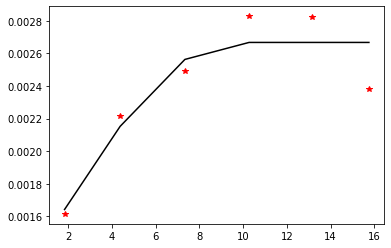

In [264]:
UK.display_variogram_model()

###### Comments:
No variogram is not possible for the auxiliary data as there is not enough data points to give suitible results